In [171]:
import pandas as pd# It is used for data manipulation for data cleaning purposes,even it is helpful to treat missing values
import seaborn as sns# visualisation library based on matplotlib
from scipy.stats import skew 
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import numpy as np
# Load the Iris dataset
iris_data = sns.load_dataset("iris")

# Display the first few rows of the dataset
iris_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
iris_data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [110]:
iris_data.shape

(150, 5)

In [111]:
skew(iris_data["sepal_length"])

0.3117530585022963

In [112]:
skew(iris_data["sepal_width"])

0.31576710633893473

In [113]:
skew(iris_data["petal_length"])

-0.2721276664567214

In [114]:
skew(iris_data["petal_width"])

-0.10193420656560036

In [115]:
kurtosis(iris_data["sepal_length"])

-0.5735679489249765

In [116]:
kurtosis(iris_data["sepal_width"])

0.18097631752246768

In [117]:
kurtosis(iris_data["petal_length"])

-1.3955358863990055

In [118]:
kurtosis(iris_data["petal_width"])

-1.336067405231553

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: >

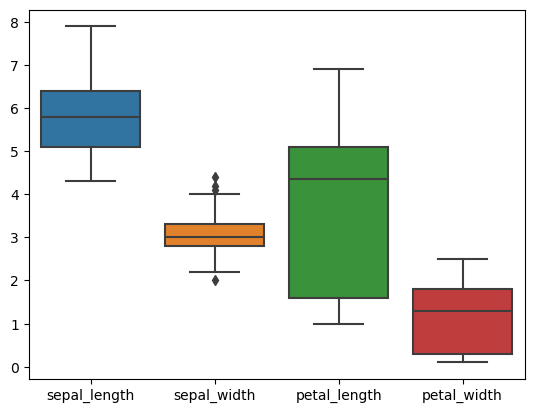

In [119]:
sns.boxplot(iris_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='species', ylabel='sepal_width'>

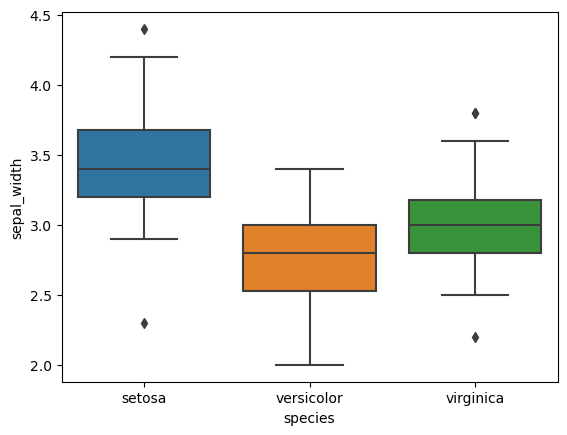

In [122]:
sns.boxplot(x="species",y="sepal_width",data=iris_data)#we have one categorical value in the dataset so use of hue is not needed here because for hue we need another categorical varible

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_94545/2187622543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data["sepal_length"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

<Axes: xlabel='sepal_length', ylabel='Density'>

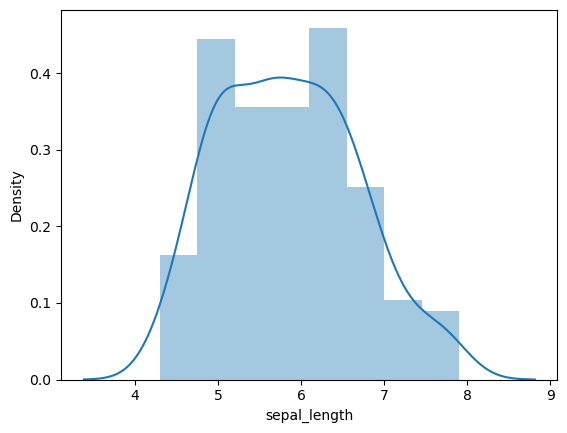

In [123]:
sns.distplot(iris_data["sepal_length"])

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_94545/553623762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data["sepal_width"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

<Axes: xlabel='sepal_width', ylabel='Density'>

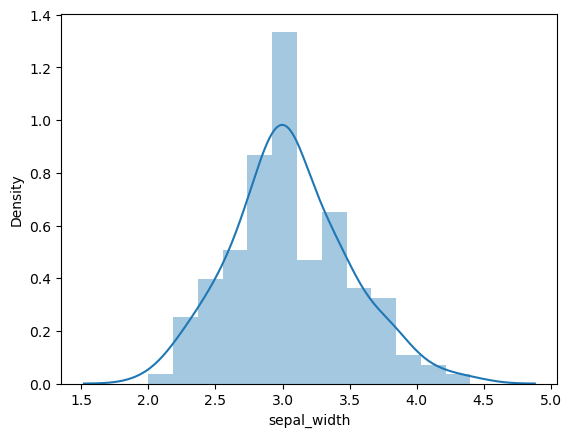

In [124]:
sns.distplot(iris_data["sepal_width"])

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_94545/3698908200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data["petal_length"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

<Axes: xlabel='petal_length', ylabel='Density'>

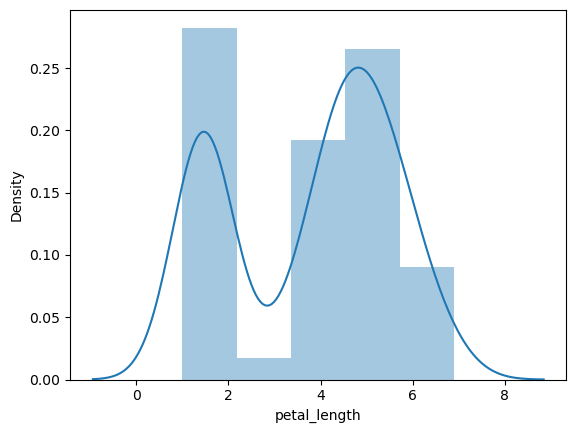

In [125]:
sns.distplot(iris_data["petal_length"])

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_94545/3240252766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data["petal_width"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

<Axes: xlabel='petal_width', ylabel='Density'>

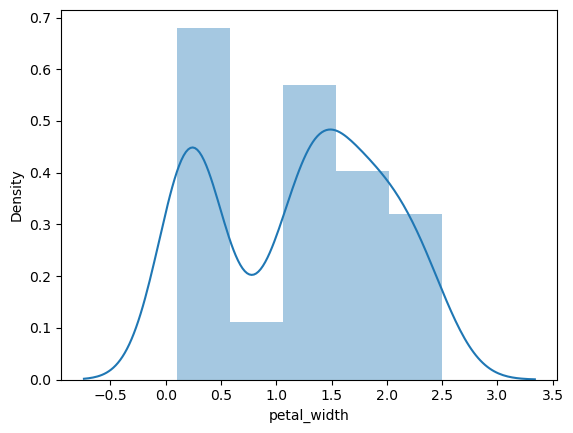

In [126]:
sns.distplot(iris_data["petal_width"])

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

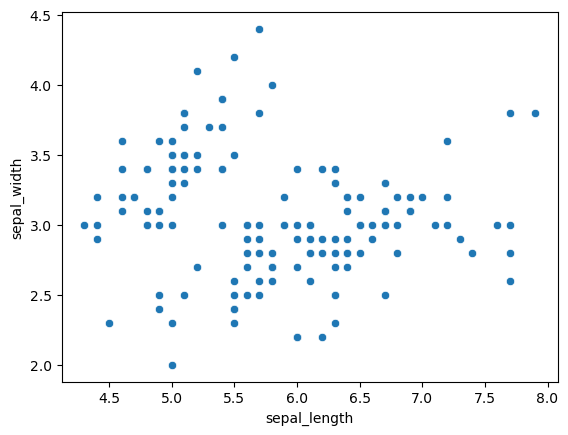

In [127]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=iris_data)
#two columns are positively corelated, with the increase of sepal_length,sepal_width also increases

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='petal_length', ylabel='petal_width'>

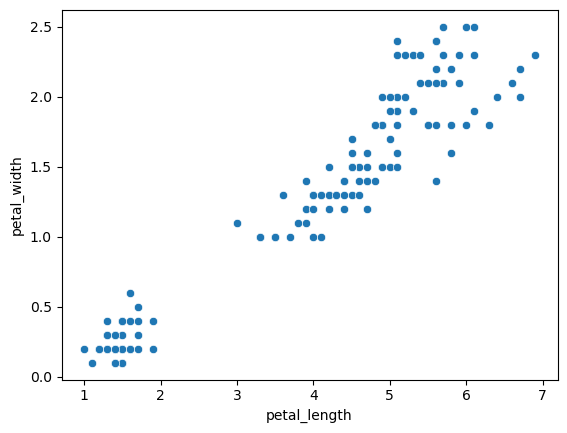

In [128]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris_data)
#two columns are positively corelated, with the increase of petal_length,petal_width also increases

In [129]:
species_onehot=pd.get_dummies(iris_data['species'])

In [130]:
species_onehot.astype(int)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [131]:
le=LabelEncoder()#saving the instance

In [132]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

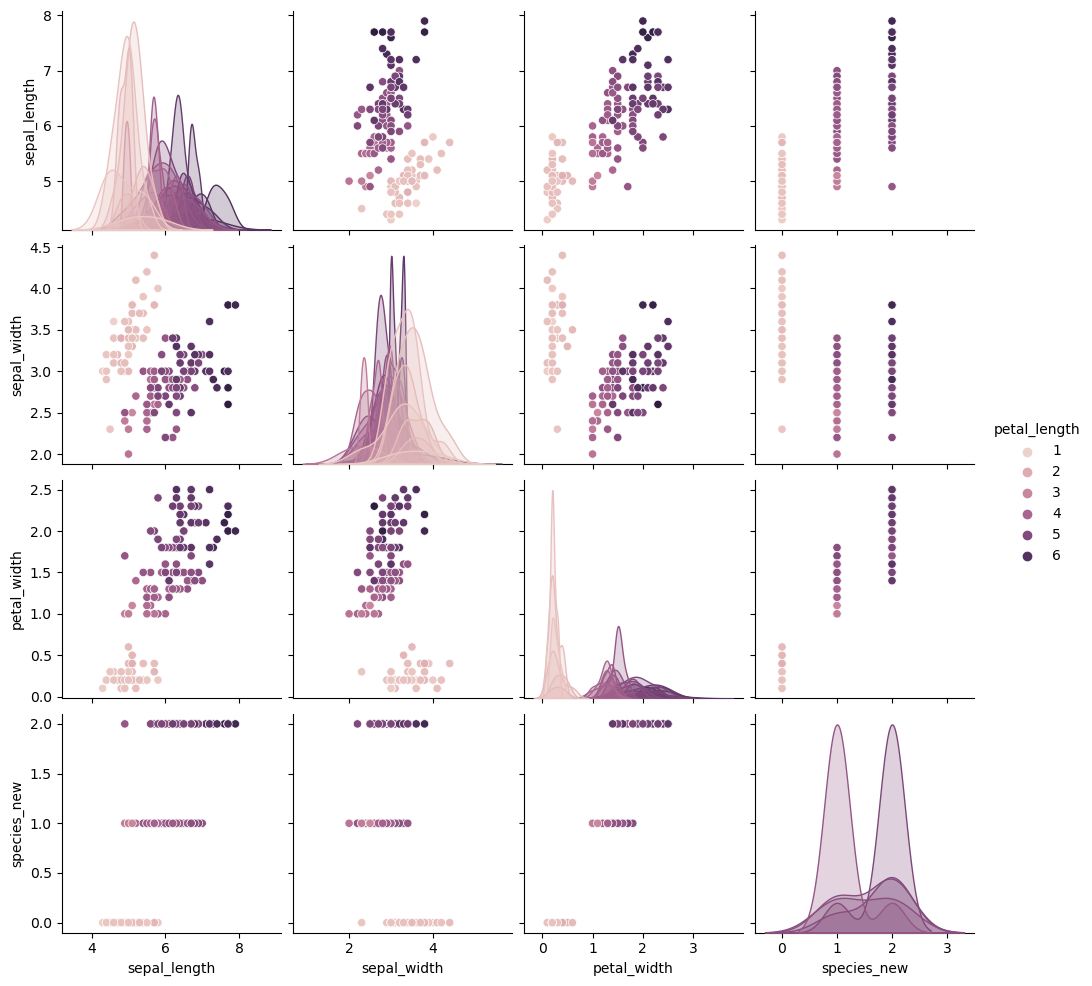

In [25]:
sns.pairplot(iris_data,hue="petal_length")#hue must always be categorical variable

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

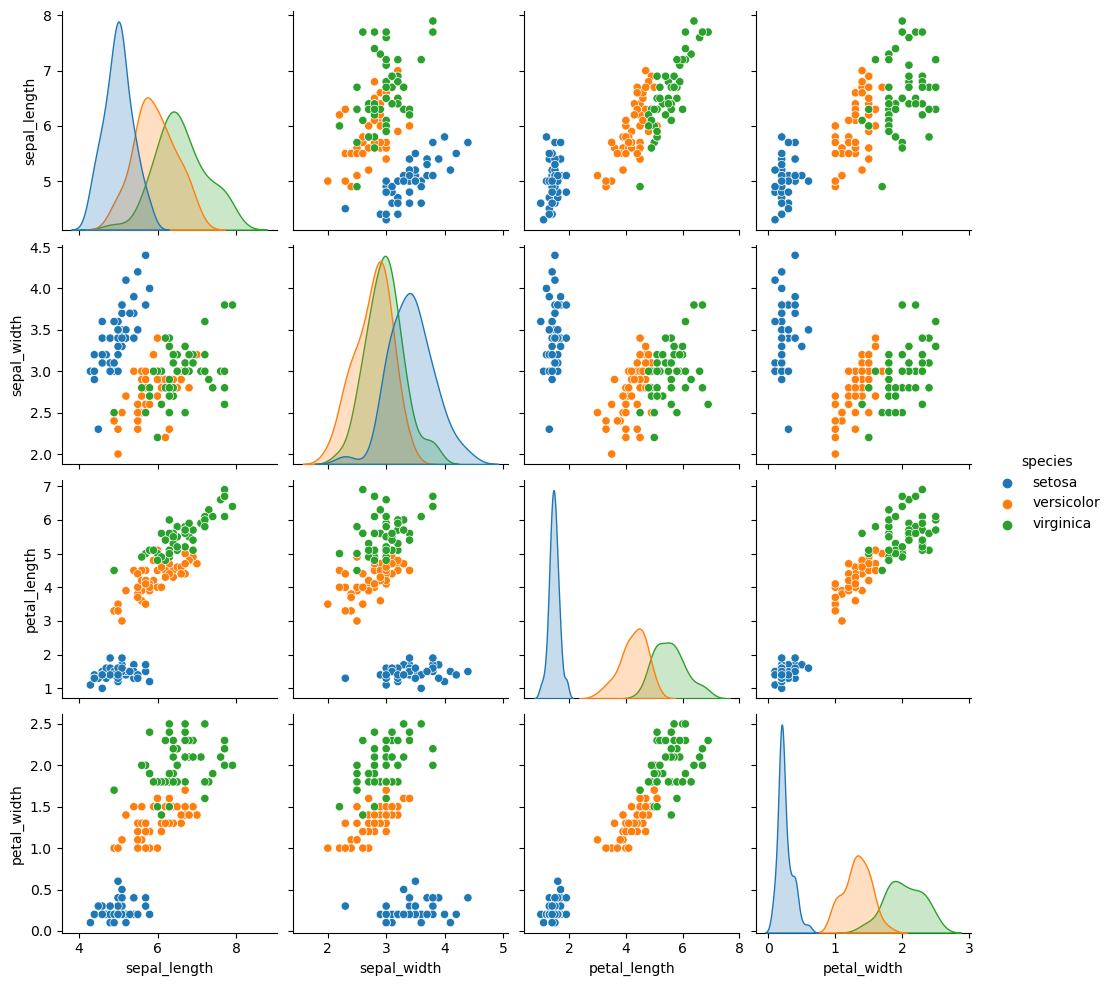

In [133]:
sns.pairplot(iris_data,hue="species")#virginica and versicolor species show a similar pattern unlike setosa, with respect to petal_length,petal_width,sepal_length,sepal_width and all the patterns show positive correlation 

In [135]:
iris_data["species_new"]=le.fit_transform(iris_data["species"])

In [136]:
iris_data.drop("species",axis=1,inplace=True)#dropping the species column permanently from the iris_data data set.axis=1 denotes columns and axis=0 denotes rows,inplace=True is for permanent deletion

In [137]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species_new
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [138]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_new'],
      dtype='object')

In [147]:
#dividing the data set into x and y.
x=iris_data.drop('species_new',axis=1)
y=iris_data['species_new']

In [148]:
scaler=MinMaxScaler()#saving the instance
scaled_data=scaler.fit_transform(x)
scaled_data=pd.DataFrame(scaled_data,columns=x.columns)
scaled_data

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [149]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=0)

In [150]:
x_train,x_test,y_train,y_test

(     sepal_length  sepal_width  petal_length  petal_width
 137      0.583333     0.458333      0.762712     0.708333
 84       0.305556     0.416667      0.593220     0.583333
 27       0.250000     0.625000      0.084746     0.041667
 127      0.500000     0.416667      0.661017     0.708333
 132      0.583333     0.333333      0.779661     0.875000
 ..            ...          ...           ...          ...
 9        0.166667     0.458333      0.084746     0.000000
 103      0.555556     0.375000      0.779661     0.708333
 67       0.416667     0.291667      0.525424     0.375000
 117      0.944444     0.750000      0.966102     0.875000
 47       0.083333     0.500000      0.067797     0.041667
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 114      0.416667     0.333333      0.694915     0.958333
 62       0.472222     0.083333      0.508475     0.375000
 33       0.333333     0.916667      0.067797     0.041667
 107      0.833333     0.3750

In [151]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [152]:
y_pred=lr.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [153]:
y_pred.shape

(30,)

In [156]:
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: species_new, dtype: int64

In [154]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9

In [162]:
precision=precision_score(y_pred,y_test,average='macro')
precision

0.8931623931623932

In [163]:
#ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
#If we encounter such error we have to add 'average' parameter which specifies the aggregation strategy when we have a multiclass problem.
#Below are the options for the average parameter
#1.None-This will return the precision_score for each class seperately.
#2.Micro-This calculates metrics gobally by counting the total true positives,false negatives and false positives.
#3.Macro-This calculates metrics for each label and find their unweighted mean.It doesnot take the class imbalanced into account.
#4.Weighted-This calculates metrics for each label and find their average weighted by support (which is the number of true instances for each label)

In [164]:
recall=recall_score(y_pred,y_test,average='macro')
recall

0.876984126984127

In [165]:
precision1=precision_score(y_pred,y_test,average='micro')
precision1

0.9

In [166]:
recall1=recall_score(y_pred,y_test,average='micro')
recall1

0.9

In [167]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  5]])

In [170]:
classification_report_logistic=classification_report(y_test,y_pred)
print(classification_report_logistic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.85      0.88        13
           2       0.71      0.83      0.77         6

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30



In [168]:
train_score=lr.score(x_train,y_train)
train_score

0.9166666666666666

In [169]:
test_score=lr.score(x_test,y_test)
test_score

0.9

In [172]:
#no overfitting scenario as train score is similar to test score